### Carga de paquetes

In [1]:
#pip install pyheif
#pip install Pillow

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import  LabelBinarizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt #Para graficar
#from skimage.io import imshow #Para graficar las imagenes
#from sklearn.preprocessing import RobustScaler
import pickle
import os
import numpy as np
from sklearn.decomposition import PCA
from PCA_funciones import matriz_fotos_desde_carpeta
import pandas as pd

Seteamos los directorios done se encuentran las fotos recortadas: ORganizadas en una carpeta por persona.

In [2]:
#root_path = "C:/MaestriaDocs/DMA - Proyecto/caras_grupo4/"
root_path = "../"
#directorio_origen = root_path + "Nuestras_Caras"
#destino = root_path + "Caras_cortadas"
dir_caras_cortadas = root_path + "Caras_cortadas"

## Preparamos la matriz inicial

Obtenemos las imágenes a procesar ya recortadas desde la carpeta /Caras_cortadas
Conversión de las imágenes a un Numpy Array. Conversión de los datos a una matriz que contiene datos sin procesar. La función array by numpy toma una lista como entrada.
Redimensionamos las imagenes a 30 X 30
La imagen se agrega a un array con los 900 pixel
Cada imagen vectorizada se agraga a una matriz formando una matriz de dimensiones cantidad de imagen X 900 pixel

In [3]:
image_matrix, image_person = matriz_fotos_desde_carpeta(dir_caras_cortadas)

Carpeta: Abel
Carpeta: Carlos
Carpeta: Federico G
Carpeta: Federico R
Carpeta: Florencia
Carpeta: Franco A
Carpeta: Franco S
Carpeta: Gerard
Carpeta: Gustavo
Carpeta: Joaquin
Carpeta: Juan
Carpeta: Lautaro
Carpeta: Lisandro
Carpeta: Marco
Carpeta: Matias
Carpeta: Natalia
Carpeta: Noelia
Carpeta: Paola
Carpeta: Victorio


In [4]:
image_matrix.shape

(6189, 900)

In [5]:
personas = np.unique(image_person)
personas

array(['Abel', 'Carlos', 'Federico G', 'Federico R', 'Florencia',
       'Franco A', 'Franco S', 'Gerard', 'Gustavo', 'Joaquin', 'Juan',
       'Lautaro', 'Lisandro', 'Marco', 'Matias', 'Natalia', 'Noelia',
       'Paola', 'Victorio'], dtype='<U10')

## PCA 

In [6]:


# Aplicar PCA y guardA

scaler = StandardScaler()
imagenes_estandarizadas = scaler.fit_transform(image_matrix)

# Guardar el escalador
ruta_scaler = root_path + 'PCA/scaler.pkl'

with open(ruta_scaler, 'wb') as f:
    pickle.dump(scaler, f)  #guardamos esto porque no vamos a tener la misma media y desvio para escalar los datos de las nuevas fotos..

pca= PCA() # pca, no filtramos por cantidad de componentes, luego lo hacemos

pca.fit(imagenes_estandarizadas)

n_inicio = 2  # Segunda componente (índice 1 en Python)
n_final = 62 # Hasta la componente 60 (índice exclusivo)
#components = pca.components_[n_inicio:n_final]

# Proyectar las imágenes al espacio de los componentes principales
projected_images = pca.transform(imagenes_estandarizadas)

# Guardar los componentes PCA
#ruta_pca = root_path + "PCA/Componentes_pca.npy"
#np.save(ruta_pca, pca.components_) ### guardamos las 900 componentes  para en el proceso posterior poder hacer una funcion que varie los componentes a utilizar para la reduccion
ruta_pca = "../PCA/Componentes_pca.npz"
np.savez(ruta_pca, components=pca.components_[n_inicio:n_final], mean=pca.mean_, labels=personas)



In [7]:
components=pca.components_[n_inicio:n_final]

### PCA-Libreria - Scree plot

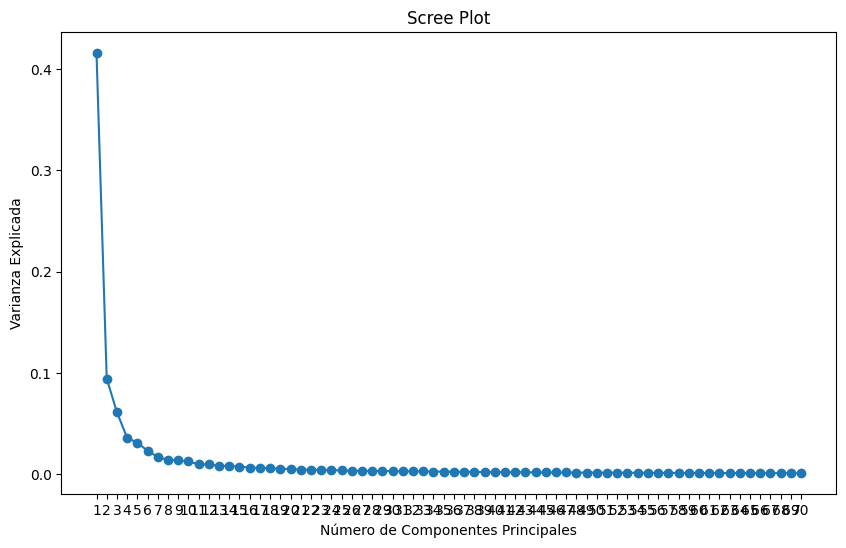

In [8]:
# Calcular las varianzas explicadas
varianza_explicada = pca.explained_variance_ratio_[:70] #el grafico hasta 900 no se podia observar bien lo acotamos
componentes_principales = np.arange(1, len(varianza_explicada) + 1)

# Crear el scree plot
plt.figure(figsize=(10, 6))
plt.plot(componentes_principales, varianza_explicada, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.xticks(componentes_principales)
#plt.grid(True)
plt.show()

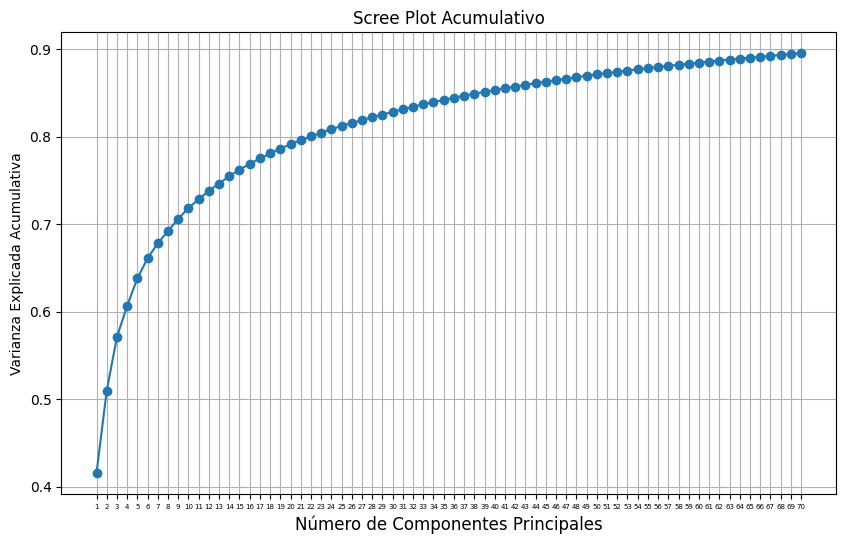

In [9]:
# Calcular la varianza explicada acumulativa
varianza_explicada = np.cumsum(pca.explained_variance_ratio_[:70])
num_componentes = len(varianza_explicada)

# Crear el scree plot acumulativo
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, num_componentes + 1), varianza_explicada, marker='o', linestyle='-')
plt.title('Scree Plot Acumulativo')
plt.xlabel('Número de Componentes Principales', fontsize=12)
plt.ylabel('Varianza Explicada Acumulativa')
plt.xticks(np.arange(1, num_componentes + 1), fontsize=5)  # Ajuste del tamaño de la fuente del eje x
plt.grid(True)
plt.show()

###  PCA-Libreria - Comparamos componentes

 Comparación de proyeccion de componentes: 1 - 2


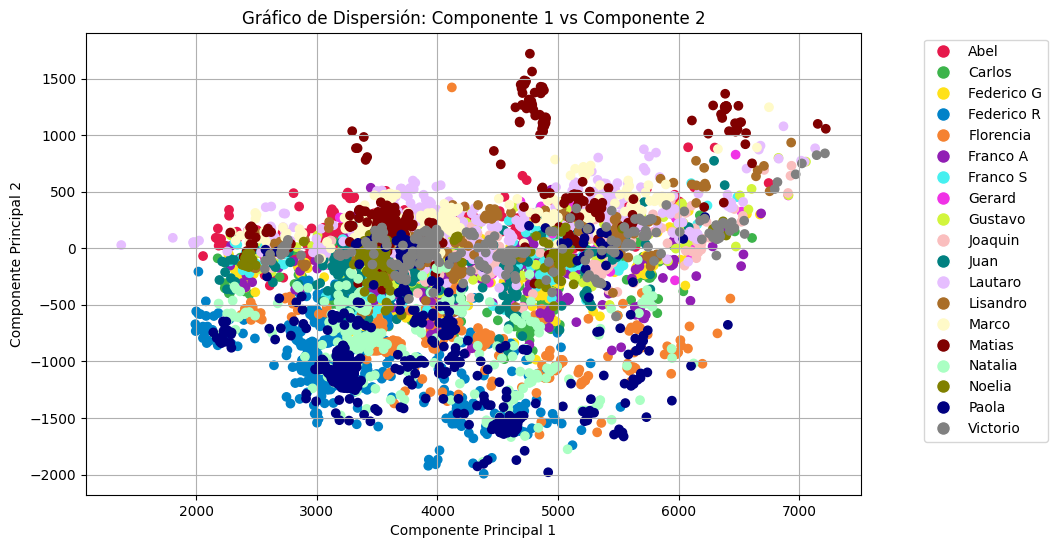

 Comparación de proyeccion de componentes: 3 - 4


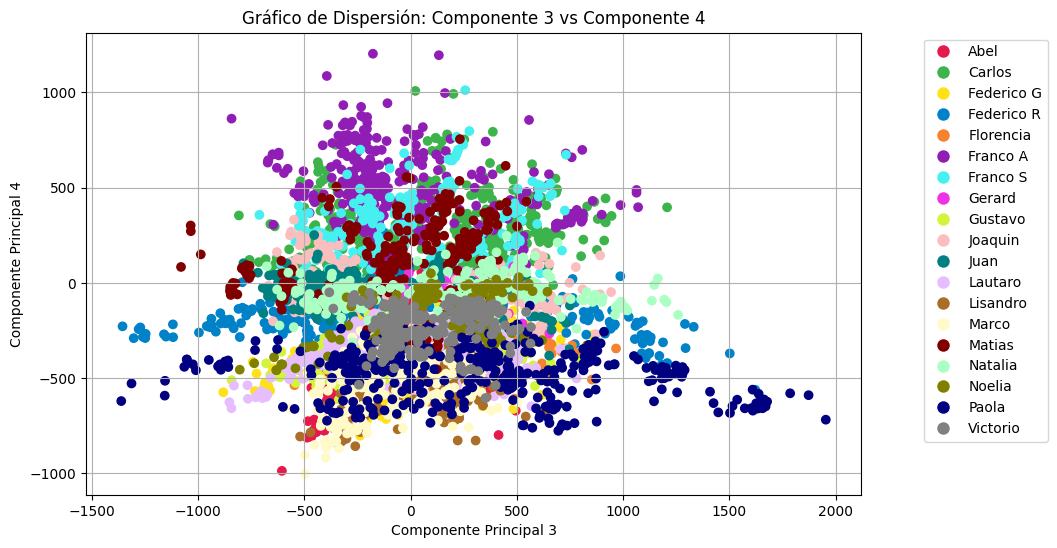

 Comparación de proyeccion de componentes: 5 - 6


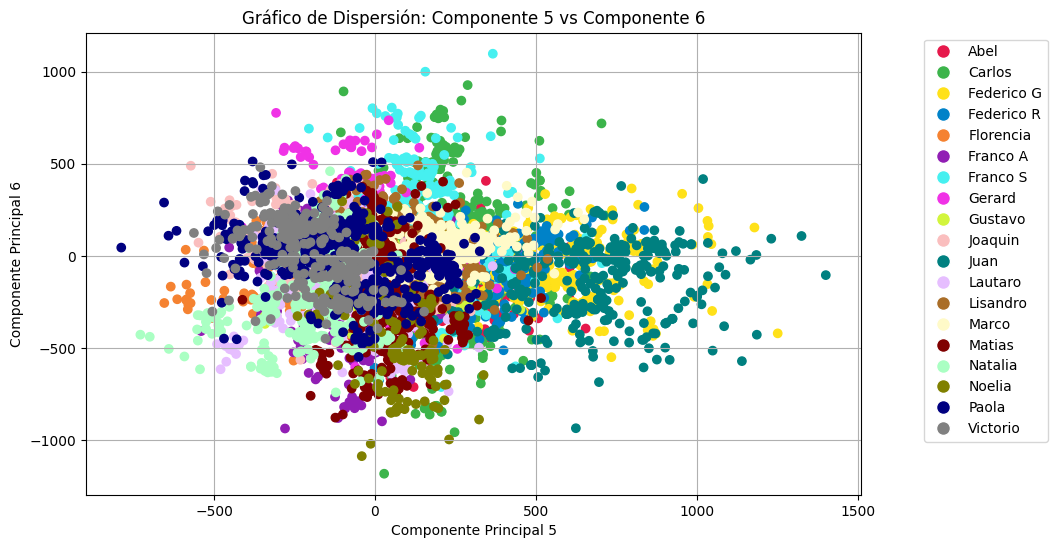

 Comparación de proyeccion de componentes: 7 - 8


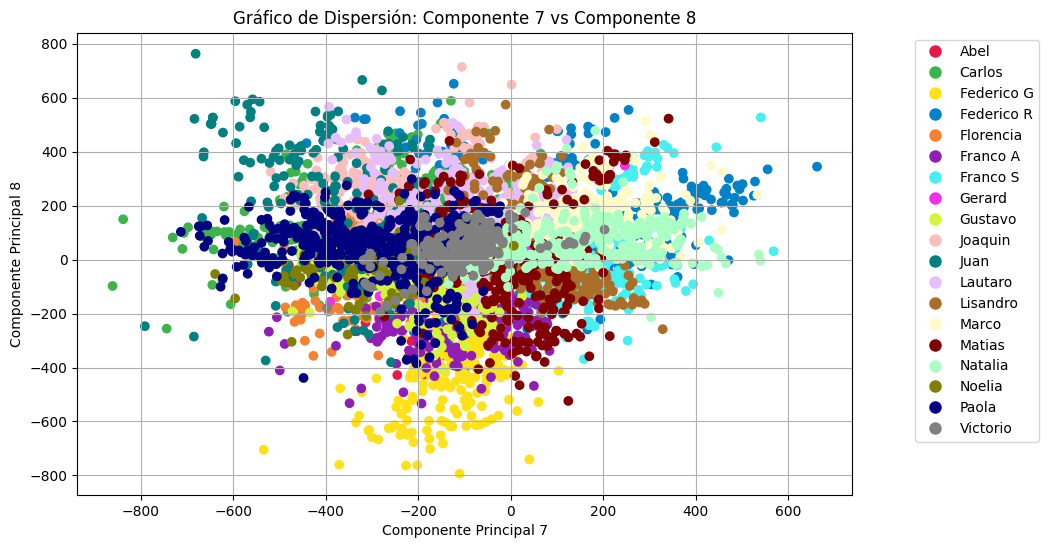

In [10]:
imagenes_transformadas = pca.transform(image_matrix)
personas = np.unique(image_person)


# Creamos una paleta de colores personalizada con 18 colores

"""paleta_colores = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#c7c7c7', '#1f77b4', '#ff7f0e',
    '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78',
    '#393b79', '#5254a3', '#6b6ecf', '#9c9ede', '#637939', '#8ca252', '#b5cf6b', '#cedb9c', '#8c6d31', '#bd9e39'
]"""

paleta_colores = [
    '#e6194b',  # Rojo brillante
    '#3cb44b',  # Verde
    '#ffe119',  # Amarillo
    '#0082c8',  # Azul
    '#f58231',  # Naranja
    '#911eb4',  # Púrpura
    '#46f0f0',  # Cian
    '#f032e6',  # Magenta
    '#d2f53c',  # Lima
    '#fabebe',  # Rosa claro
    '#008080',  # Teal
    '#e6beff',  # Lila
    '#aa6e28',  # Marrón
    '#fffac8',  # Amarillo pálido
    '#800000',  # Marrón oscuro
    '#aaffc3',  # Verde pálido
    '#808000',  # Verde oliva
    
    '#000080',  # Azul marino
    '#808080' ,  # Gris
    '#ffd8b1'  # Durazno
]
# Creamos un diccionario que asigna a cada persona un color específico
colores = {}
for i, persona in enumerate(personas):
    colores[persona] = paleta_colores[i % len(paleta_colores)]
# Convertimos los nombres de las personas en colores según el diccionario
colores_personas = [colores[persona] for persona in image_person]



for i in range(0, 8, 2):
    
    # Iteramos de 2 para ir observando relacion entre los componentes
    # Extraer los primeros dos componentes principales
    componente1 = imagenes_transformadas[:, i] #relacion de la componente1 en cada
    componente2 = imagenes_transformadas[:, i+1] #relacion de la componente2 en cada

    print(f" Comparación de proyeccion de componentes: {i+1} - {i+2}")
   
    # Crear leyenda personalizada
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colores[persona], markersize=10, label=persona) for persona in personas]

    # Crear el scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(componente1, componente2, c=colores_personas)
    plt.title(f'Gráfico de Dispersión: Componente {i+1} vs Componente {i+2}')
    plt.xlabel(f'Componente Principal {i+1}')
    plt.ylabel(f'Componente Principal {i+2}')
    plt.grid(True)
    plt.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.show()

###  PCA-Libreria - Observamos imagenes de las primeras componentes

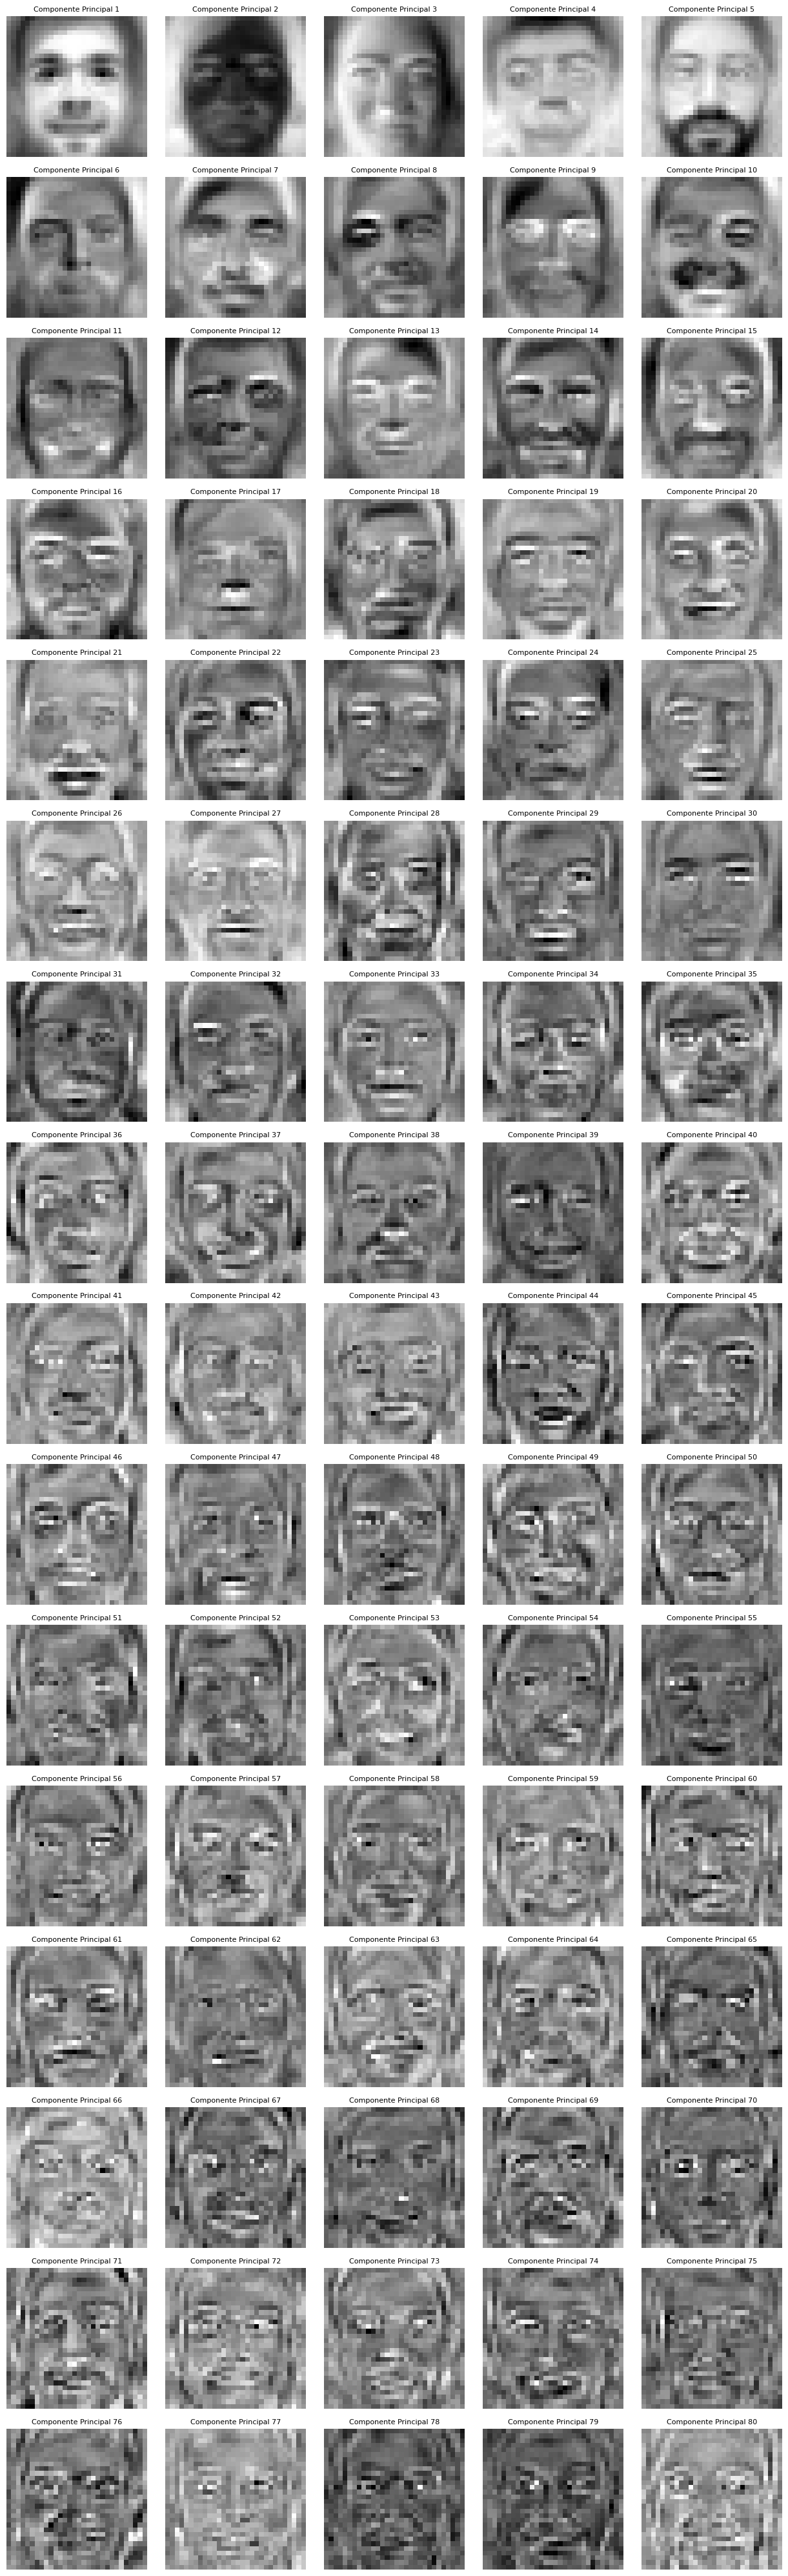

In [11]:

# observamos, imagenes armadas con los primeros 4 componentes principales
componentes=80
columnas=5
filas = componentes//columnas
fig, axs = plt.subplots(filas, columnas, figsize=(2.5*columnas, 2.5*filas))

for i in range(componentes):
    # Extrae la componente principal correspondiente
    #componente_principal = eigenvectors[:, indice_componente_principal]
    indice_componente_principal = i# Definir los números

    # Obtener la parte entera de la división
    parte_entera = (i // columnas) 

    # Obtener el resto de la división
    resto = i % columnas

    # Imprimir los resultados
    componente_principal_normalizada =  pca.components_.copy()[indice_componente_principal]
    # Convierte la componente principal normalizada en una matriz de la forma de una imagen (por ejemplo, 30x30 píxeles)
    imagen_componente_principal = componente_principal_normalizada.reshape((30, 30))

    axs[parte_entera, resto].imshow(imagen_componente_principal, cmap='gray')
    axs[parte_entera, resto].set_xticks([])
    axs[parte_entera, resto].set_yticks([])
    axs[parte_entera, resto].set_title(f'Componente Principal {indice_componente_principal + 1}', fontsize=8)
    axs[parte_entera, resto].axis('off')
  
plt.tight_layout()
plt.show()

## PCA Paso a Paso

In [12]:

new_faces_array = image_matrix

#### Pca-Paso A Paso - Estandarizamos

In [13]:
# Paso 1: Calcular la media de cada característica
mean = np.mean(new_faces_array, axis=0)

# Paso 2: Calcular la desviación estándar de cada característica
std = np.std(new_faces_array, axis=0)

# Paso 3: Estandarizar los datos (restar la media y dividir por la desviación estándar)
new_faces_array_estandarizado = (new_faces_array - mean) / std #equivaente a imagenes_estandarizadas

In [14]:
new_faces_array_estandarizado

array([[ 1.70569512,  1.64998214,  1.92999458, ..., -0.48514059,
        -0.4398375 , -0.39432883],
       [ 0.53821961,  0.18529143,  0.56727541, ..., -0.82049656,
        -0.79635973, -0.85325599],
       [ 0.80763703,  0.77453482,  0.8755095 , ...,  0.8190215 ,
         2.84016711,  2.87323248],
       ...,
       [-0.01857641, -0.33660986, -0.21142126, ...,  0.05515513,
         0.20190254, -0.54118552],
       [ 0.96928749,  0.50516641,  0.64838964, ...,  0.63271263,
         1.0397298 ,  0.17474083],
       [ 0.96928749,  0.30314011,  0.38882409, ...,  0.59545085,
         0.75451201,  0.43174004]])

In [15]:
imagenes_estandarizadas #observamos que es lo mismoque se obtiene opr el paquer

array([[ 1.70569512,  1.64998214,  1.92999458, ..., -0.48514059,
        -0.4398375 , -0.39432883],
       [ 0.53821961,  0.18529143,  0.56727541, ..., -0.82049656,
        -0.79635973, -0.85325599],
       [ 0.80763703,  0.77453482,  0.8755095 , ...,  0.8190215 ,
         2.84016711,  2.87323248],
       ...,
       [-0.01857641, -0.33660986, -0.21142126, ...,  0.05515513,
         0.20190254, -0.54118552],
       [ 0.96928749,  0.50516641,  0.64838964, ...,  0.63271263,
         1.0397298 ,  0.17474083],
       [ 0.96928749,  0.30314011,  0.38882409, ...,  0.59545085,
         0.75451201,  0.43174004]])

### Pca-Paso A Paso - Calculamos las matrices

In [16]:
# Paso 2: Cálculo matriz de Covarianza
cov_matrix = np.cov(new_faces_array_estandarizado, rowvar=False)

In [17]:
# Paso 3: Cálculo matriz eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [18]:
# Paso 4: Ordenar los eigenvectors por disminución eigenvalues
sort_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_indices]
eigenvectors = eigenvectors[:, sort_indices]

In [19]:
# Paso 5: Elejir la cantidad de componentes principales que se desean conservar
explained_variances = eigenvalues / np.sum(eigenvalues) * 100
total_variance = np.cumsum(explained_variances) 
# calcula la suma acumulativa de los elementos en el arreglo explained_variances utilizando la función cumsum() de NumPy.

# explained_variances es un arreglo unidimensional que contiene las varianzas explicadas por cada componente principal en orden descendente 
# (es decir, el primer elemento es la varianza explicada por el primer componente principal, el segundo elemento es la suma de las varianzas explicadas 
# por el primer y segundo componentes principales, y así sucesivamente).
# El resultado de np.cumsum(explained_variances) será otro total_variance  de la misma longitud que explained_variances, 
# donde cada elemento representa la suma acumulativa de las varianzas explicadas hasta el índice correspondiente.
num_components = np.argmax(total_variance >= 90) + 1
# np.argmax(total_variance >= 95) devuelve el índice del primer elemento en el arreglo total_variance que es mayor o igual a 95. 
# Luego se le suma 1 para obtener el número de componentes principales necesario para explicar al menos el 95% de la varianza total.

print(f'Cantidad de componentes a utilizar: {num_components}')
print(explained_variances)


Cantidad de componentes a utilizar: 75
[4.15499033e+01 9.44160397e+00 6.11667576e+00 3.58531273e+00
 3.11848208e+00 2.30506856e+00 1.70801925e+00 1.41589169e+00
 1.36790582e+00 1.25880117e+00 9.83306939e-01 9.66434799e-01
 8.37099715e-01 8.24459846e-01 7.58505008e-01 6.56864919e-01
 6.24216264e-01 5.80017241e-01 5.48051023e-01 4.97200331e-01
 4.57475221e-01 4.38652312e-01 4.20591340e-01 4.04411296e-01
 3.71164004e-01 3.38199582e-01 3.34224060e-01 3.23390734e-01
 3.13403955e-01 3.06876451e-01 2.91143014e-01 2.85054608e-01
 2.74821428e-01 2.67644661e-01 2.48381206e-01 2.44694200e-01
 2.30821825e-01 2.27016619e-01 2.14863691e-01 2.04627741e-01
 2.00706869e-01 2.00184086e-01 1.92577450e-01 1.81767198e-01
 1.79786524e-01 1.75280464e-01 1.71076490e-01 1.62327313e-01
 1.60033562e-01 1.55541268e-01 1.53666649e-01 1.53130755e-01
 1.44515514e-01 1.41726884e-01 1.35831923e-01 1.31895370e-01
 1.30168511e-01 1.26438514e-01 1.19956905e-01 1.18145388e-01
 1.16803042e-01 1.15572933e-01 1.14484563e-01 

In [20]:
# Paso 6: Proyectar los datos centrados sobre la nueva base formada por los eigenvectors
new_basis = eigenvectors[:, :num_components]
new_faces_array_transformed = np.dot(new_faces_array_estandarizado, eigenvectors) #multiplicacion matricial

In [21]:
eigenvectors #equivalente a PCA component calculado previamente con la libreria

array([[-3.15210254e-02, -2.60458361e-02,  3.55075011e-02, ...,
         3.52659576e-03,  8.68899356e-04, -8.47343032e-03],
       [-2.77634758e-02, -3.72570808e-02,  3.51760270e-02, ...,
        -9.48217734e-03, -6.83212162e-03,  2.58427246e-03],
       [-2.53397278e-02, -4.77384461e-02,  3.08472232e-02, ...,
         8.11508623e-05, -1.06579525e-03, -2.36810765e-03],
       ...,
       [-2.53479642e-02, -5.00743204e-02,  3.26933109e-02, ...,
         5.53695501e-03,  7.72900736e-03,  4.61151086e-04],
       [-2.52259841e-02, -4.54188097e-02,  3.72449568e-02, ...,
         1.30875099e-03, -2.19469157e-03, -5.63061382e-03],
       [-2.72283483e-02, -4.18759351e-02,  3.61799302e-02, ...,
         7.56608509e-04,  1.53200216e-03, -5.91179503e-03]])

In [22]:
eigenvectors.T

array([[-3.15210254e-02, -2.77634758e-02, -2.53397278e-02, ...,
        -2.53479642e-02, -2.52259841e-02, -2.72283483e-02],
       [-2.60458361e-02, -3.72570808e-02, -4.77384461e-02, ...,
        -5.00743204e-02, -4.54188097e-02, -4.18759351e-02],
       [ 3.55075011e-02,  3.51760270e-02,  3.08472232e-02, ...,
         3.26933109e-02,  3.72449568e-02,  3.61799302e-02],
       ...,
       [ 3.52659576e-03, -9.48217734e-03,  8.11508623e-05, ...,
         5.53695501e-03,  1.30875099e-03,  7.56608509e-04],
       [ 8.68899356e-04, -6.83212162e-03, -1.06579525e-03, ...,
         7.72900736e-03, -2.19469157e-03,  1.53200216e-03],
       [-8.47343032e-03,  2.58427246e-03, -2.36810765e-03, ...,
         4.61151086e-04, -5.63061382e-03, -5.91179503e-03]])

In [23]:
pca.components_

array([[ 3.15210254e-02,  2.77634758e-02,  2.53397278e-02, ...,
         2.53479642e-02,  2.52259841e-02,  2.72283483e-02],
       [ 2.60458361e-02,  3.72570808e-02,  4.77384461e-02, ...,
         5.00743204e-02,  4.54188097e-02,  4.18759351e-02],
       [-3.55075011e-02, -3.51760270e-02, -3.08472232e-02, ...,
        -3.26933109e-02, -3.72449568e-02, -3.61799302e-02],
       ...,
       [ 3.52659576e-03, -9.48217734e-03,  8.11508624e-05, ...,
         5.53695501e-03,  1.30875099e-03,  7.56608509e-04],
       [ 8.68899356e-04, -6.83212162e-03, -1.06579525e-03, ...,
         7.72900736e-03, -2.19469157e-03,  1.53200216e-03],
       [-8.47343032e-03,  2.58427246e-03, -2.36810765e-03, ...,
         4.61151086e-04, -5.63061382e-03, -5.91179503e-03]])

### Pca-Paso A Paso - Scree plot

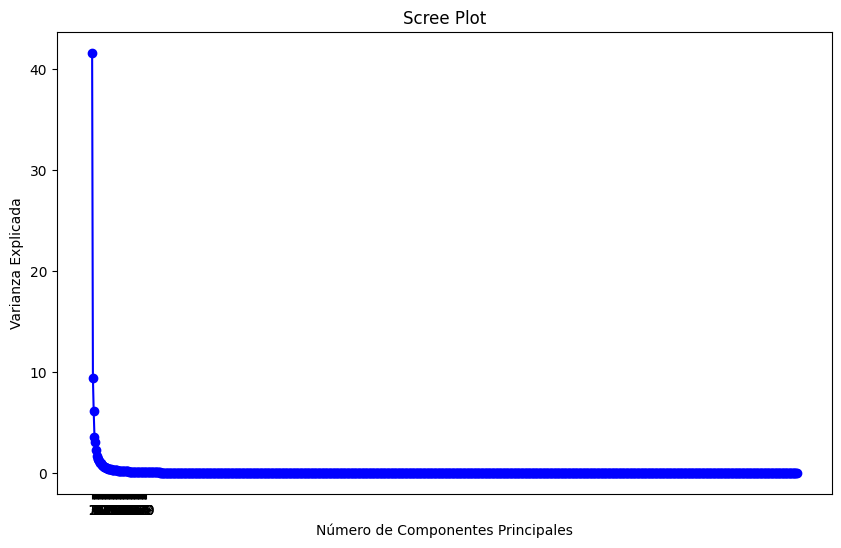

In [24]:
# Calcular las varianzas explicadas

# Crear el scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variances)+1), explained_variances, 'bo-')
#plt.plot(componentes_principales, explained_variances, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.xticks(componentes_principales)
#plt.grid(True)
plt.show()

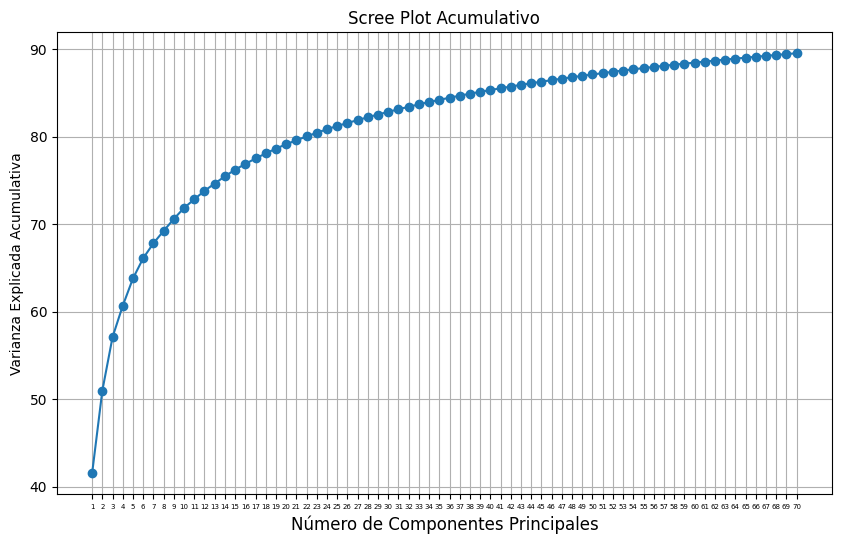

In [25]:
# Calcular la varianza explicada acumulativa
explained_variances2 = np.cumsum(explained_variances[:70])
num_componentes = len(explained_variances2)

# Crear el scree plot acumulativo
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, num_componentes + 1), explained_variances2, marker='o', linestyle='-')
plt.title('Scree Plot Acumulativo')
plt.xlabel('Número de Componentes Principales', fontsize=12)
plt.ylabel('Varianza Explicada Acumulativa')
plt.xticks(np.arange(1, num_componentes + 1), fontsize=5)  # Ajuste del tamaño de la fuente del eje x
plt.grid(True)
plt.show()

### Pca-Paso A Paso - Comparamos componentes

 Comparación de proyeccion de componentes: 1 - 2


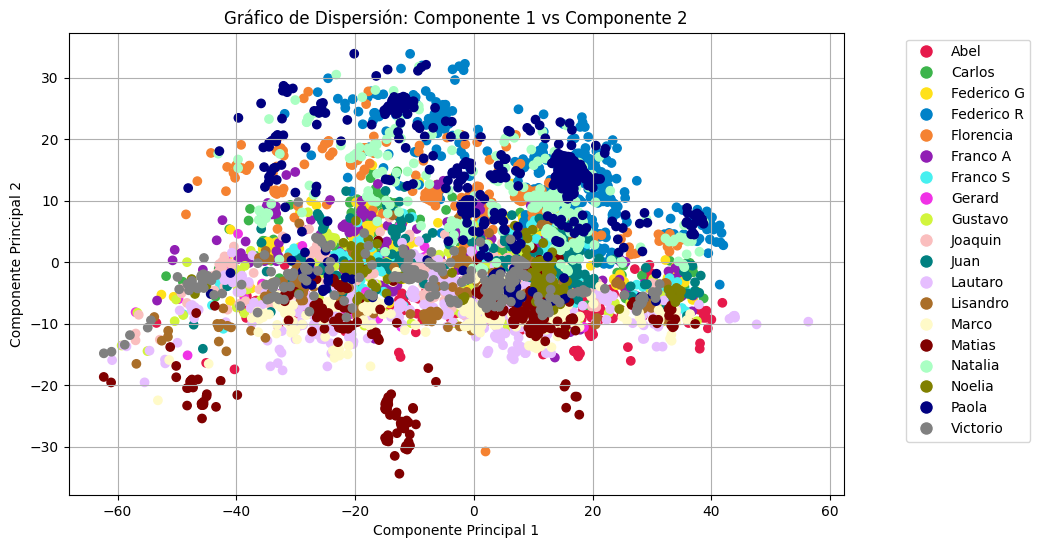

 Comparación de proyeccion de componentes: 3 - 4


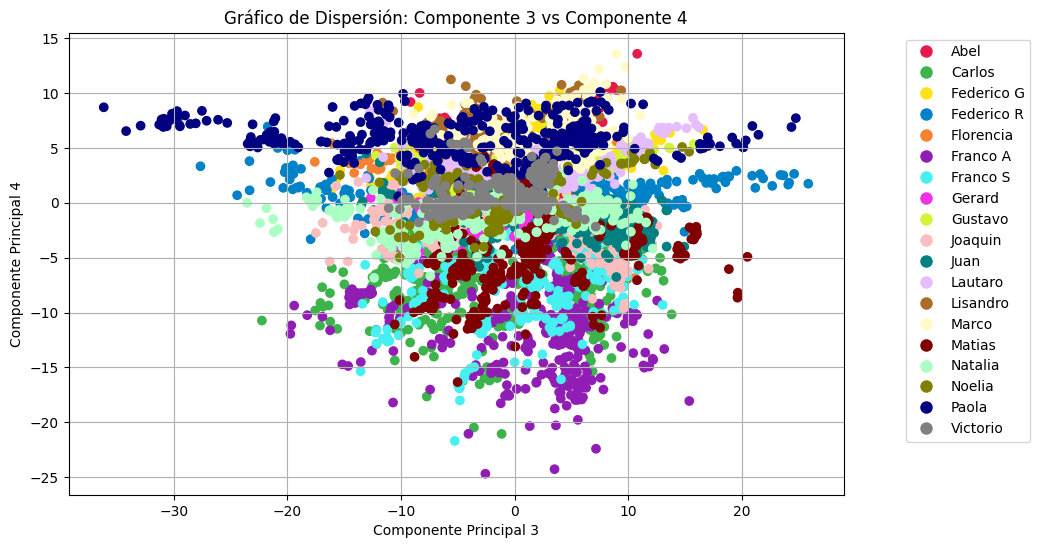

 Comparación de proyeccion de componentes: 5 - 6


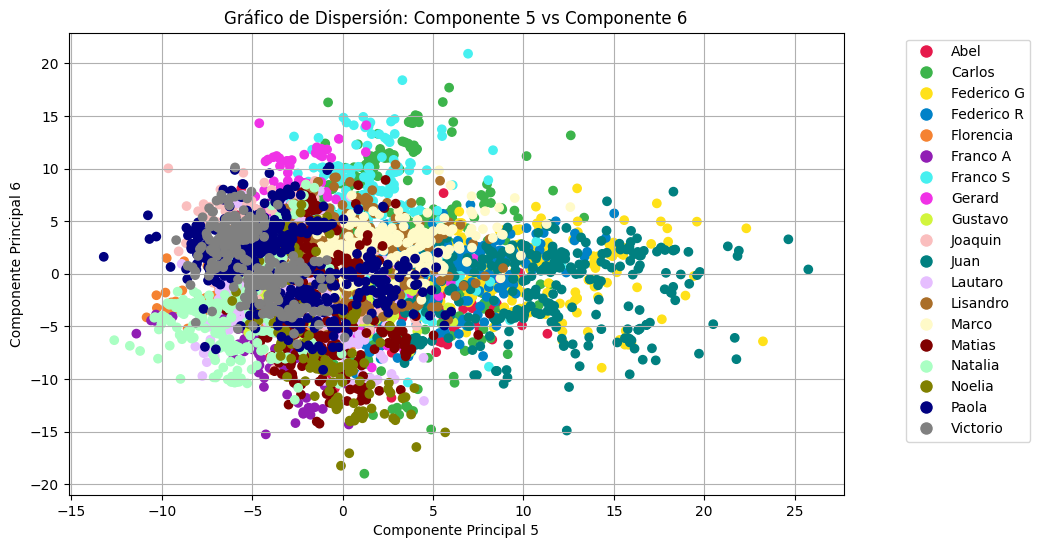

 Comparación de proyeccion de componentes: 7 - 8


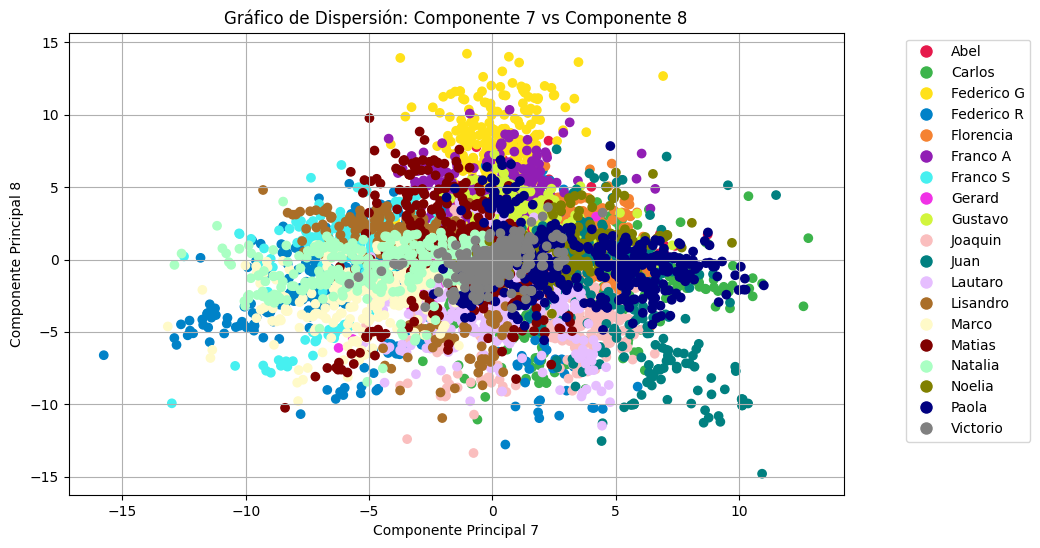

In [26]:
#imagenes_transformadas = pca.transform(image_matrix)
personas = np.unique(image_person)

new_faces_array_transformed
# Creamos una paleta de colores personalizada con 18 colores

"""paleta_colores = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#c7c7c7', '#1f77b4', '#ff7f0e',
    '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78',
    '#393b79', '#5254a3', '#6b6ecf', '#9c9ede', '#637939', '#8ca252', '#b5cf6b', '#cedb9c', '#8c6d31', '#bd9e39'
]"""

paleta_colores = [
    '#e6194b',  # Rojo brillante
    '#3cb44b',  # Verde
    '#ffe119',  # Amarillo
    '#0082c8',  # Azul
    '#f58231',  # Naranja
    '#911eb4',  # Púrpura
    '#46f0f0',  # Cian
    '#f032e6',  # Magenta
    '#d2f53c',  # Lima
    '#fabebe',  # Rosa claro
    '#008080',  # Teal
    '#e6beff',  # Lila
    '#aa6e28',  # Marrón
    '#fffac8',  # Amarillo pálido
    '#800000',  # Marrón oscuro
    '#aaffc3',  # Verde pálido
    '#808000',  # Verde oliva
    
    '#000080',  # Azul marino
    '#808080' ,  # Gris
    '#ffd8b1'  # Durazno
]
# Creamos un diccionario que asigna a cada persona un color específico
colores = {}
for i, persona in enumerate(personas):
    colores[persona] = paleta_colores[i % len(paleta_colores)]
# Convertimos los nombres de las personas en colores según el diccionario
colores_personas = [colores[persona] for persona in image_person]



for i in range(0, 8, 2):
    
    # Iteramos de 2 para ir observando relacion entre los componentes
    # Extraer los primeros dos componentes principales
    componente1 = new_faces_array_transformed[:, i] #relacion de la componente1 en cada
    componente2 = new_faces_array_transformed[:, i+1] #relacion de la componente2 en cada

    print(f" Comparación de proyeccion de componentes: {i+1} - {i+2}")
   
    # Crear leyenda personalizada
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colores[persona], markersize=10, label=persona) for persona in personas]

    # Crear el scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(componente1, componente2, c=colores_personas)
    plt.title(f'Gráfico de Dispersión: Componente {i+1} vs Componente {i+2}')
    plt.xlabel(f'Componente Principal {i+1}')
    plt.ylabel(f'Componente Principal {i+2}')
    plt.grid(True)
    plt.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.show()

### Pca-Paso A Paso - Observamos imagenes de las primeras componentes

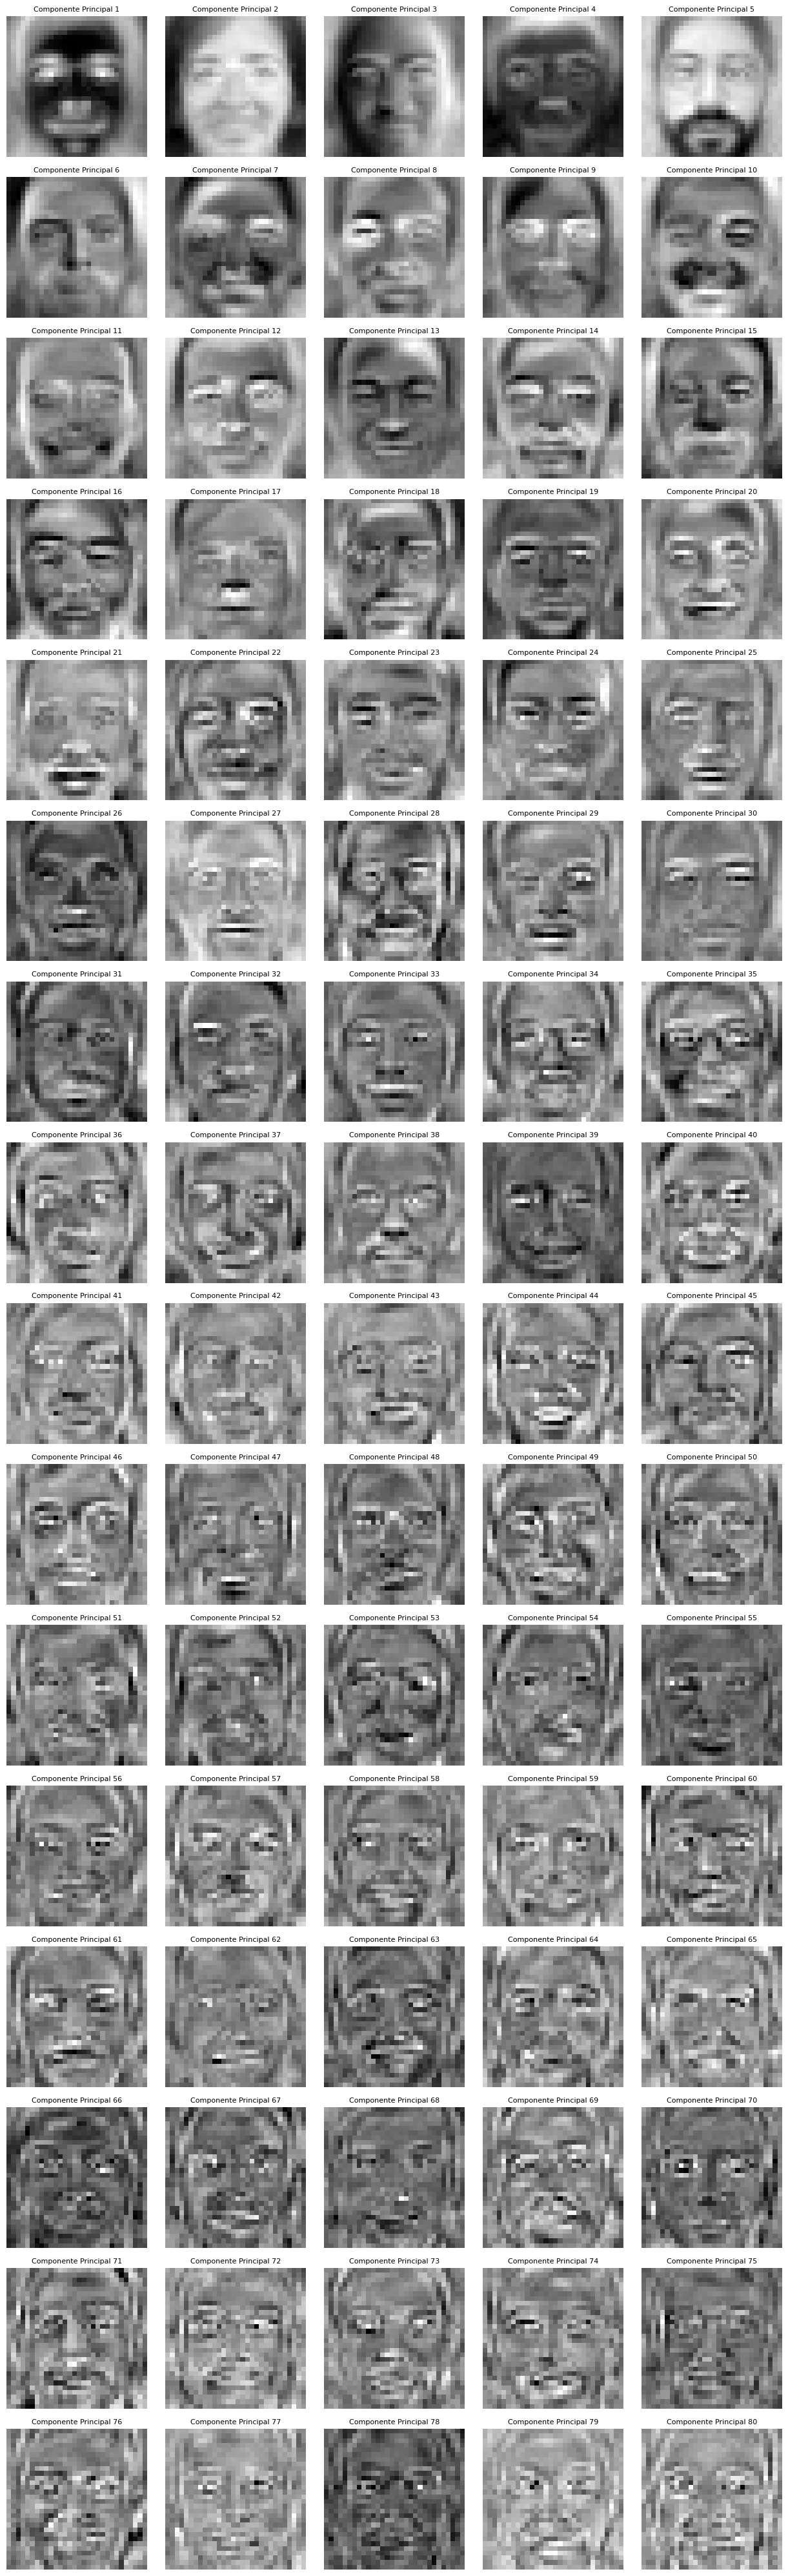

In [27]:
# observamos, imagenes armadas con los primeros  componentes principales
componentes=80
columnas=5
filas = componentes//columnas
fig, axs = plt.subplots(filas, columnas, figsize=(2.5*columnas, 2.5*filas))

for i in range(componentes):
    # Extrae la componente principal correspondiente
    #componente_principal = eigenvectors[:, indice_componente_principal]
    indice_componente_principal = i# Definir los números

    # Obtener la parte entera de la división
    parte_entera = (i // columnas) 

    # Obtener el resto de la división
    resto = i % columnas

    # Imprimir los resultados
    #componente_principal_normalizada =  pca.components_.copy()[indice_componente_principal]
    componente_principal_normalizada = eigenvectors[:, indice_componente_principal]
    # Convierte la componente principal normalizada en una matriz de la forma de una imagen (por ejemplo, 30x30 píxeles)
    imagen_componente_principal = componente_principal_normalizada.reshape((30, 30))

    axs[parte_entera, resto].imshow(imagen_componente_principal, cmap='gray')
    axs[parte_entera, resto].set_xticks([])
    axs[parte_entera, resto].set_yticks([])
    axs[parte_entera, resto].set_title(f'Componente Principal {indice_componente_principal + 1}', fontsize=8)
    axs[parte_entera, resto].axis('off')
  
plt.tight_layout()
plt.show()

In [28]:
## Back Propagation

In [29]:
# Cargar los componentes PCA guardados
#ruta_pca = root_path + "PCA/Componentes_pca.npy" #lo tenemos en memoria pero lo leemos nuevamente por si separamos el codigo
#pca_components = np.load(ruta_pca)
ruta_pca = "../PCA/Componentes_pca.npz" #lo tenemos en memoria pero lo leemos nuevamente por si separamos el codigo
#pca_components = np.load(ruta_pca)
# Cargar los datos del archivo .npz
data = np.load(ruta_pca, allow_pickle=True)

components = data['components']  # Componentes principales
#mean = data['mean']              # Media de los datos
labels = data['labels']          # Etiquetas asociadas

# Cargar el escalador
ruta_scaler = root_path + 'PCA/scaler.pkl' #
with open(ruta_scaler, 'rb') as f:
    scaler = pickle.load(f)

In [30]:


# Estandarizar las imágenes usando el escalador cargado
nuevas_imagenes_estandarizadas = scaler.transform(image_matrix)  # Escalador ya cargado

# Centrar las imágenes con la media del PCA #no es necesario si se usa scalador
#nuevas_imagenes_centradas = nuevas_imagenes_estandarizadas - mean

# Proyectar al espacio PCA
imagenes_pca_reducidas = np.dot(nuevas_imagenes_estandarizadas, components.T)


#print(imagenes_pca_reducidas)

imagenes_pca_reducidas.shape
personas = np.unique(image_person)
image_person #(vector que tiene el nombre de la persona de cada foto)
personas
personas.shape
cantidad_personas = len(personas)
print(cantidad_personas) 
cantidad_fotos = len(image_person)
cantidad_fotos

imagenes_pca_reducidas[0]

19


array([  8.36224899, -10.01519288,   4.99113703,   0.11094852,
         0.18065166,  -0.95838255,   6.63446276,   0.05465013,
        -5.18448155,  -5.48256726,   6.41692577,   1.7746612 ,
         0.69014505,   5.56618947,   4.03136754,   0.25359875,
         1.40424558,  -5.10309995,   1.54683321,  -2.17727087,
        -0.81885756,   0.22987444,   0.20922474,   3.18115919,
         0.64149739,  -1.17448055,  -1.30188845,   1.06106612,
         0.07599422,  -1.41860854,  -1.5791687 ,   2.40938387,
        -1.87624728,  -1.86152323,   0.65896739,  -0.85283892,
         1.29045743,   0.91993477,  -0.86514607,  -0.03546731,
         1.48120385,   0.22733357,   0.20635822,  -0.80063224,
        -0.62128505,  -0.0815304 ,  -1.04177712,  -0.81237902,
         1.0848484 ,  -0.53679092,   1.5053473 ,  -2.57678078,
        -1.15874501,  -1.2431842 ,  -2.63718661,   0.50060372,
        -0.50490598,   0.74378695,  -0.05513417,   0.28265299])

In [31]:

# Convertir los valores de la var categórica en números
#salida_lista = LabelBinarizer().fit_transform(image_person) #convierte los nombres (var categorica) en vextores con un 1 en la posicion del nombre
#correspondiente, tiene un renglon por foto y el vector una columna por nombre solo un 1 en el nombre de la persona de la foto


label_binarizer = LabelBinarizer()
salida_lista = label_binarizer.fit_transform(image_person)

X = imagenes_pca_reducidas
Y = salida_lista


# Convierte la lista a un arreglo NumPy
#salida_lista = nombres_personas
salida = np.array(salida_lista)
Y = salida 


# Semilla para reproducibilidad
np.random.seed(1021) #Establece la semilla para las funciones aleatorias de numpy.  
#tf.random.set_seed(1021) #Establece la semilla para las funciones aleatorias de TensorFlow, asegurando que los pesos iniciales de la red neuronal y 4cualquier otra operación aleatoria en TensorFlow sean reproducibles.
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1021)

In [32]:
salida_lista

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [33]:
salida

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [34]:

# Inicialización de parámetros
input_size = X_train.shape[1]  # Número de características (componentes PCA)
epoch_limit = 300

hidden_size = X_train.shape[1]*2# Número de neuronas en la capa oculta
output_size = 19  # Número de clases (cantidad de personas)

# Inicialización de pesos y biases
np.random.seed(1021)
W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(output_size, hidden_size) * 0.01
b2 = np.zeros((output_size, 1))

# Funciones de activación

from Funciones import relu
from Funciones import softmax
from Funciones import relu_derivative

# Función de pérdida: entropía cruzada

from Funciones import categorical_crossentropy

# Forward propagation

from Funciones import forward_propagation

# Backpropagation

from Funciones import backpropagation

# Entrenamiento del modelo
epochs = epoch_limit
learning_rate = 0.5
for epoch in range(epochs):
    # Forward propagation
    Z1, A1, Z2, A2 = forward_propagation(X_train, W1, b1, W2, b2)

    # Cálculo de la pérdida
    loss = categorical_crossentropy(Y_train.T, A2)

    # Aquí puedes imprimir el avance en cada epoch
    if epoch % 100 == 0 or epoch == epochs - 1:  # Imprime cada 100 epochs o el último epoch
        # Calcular precisión en el conjunto de entrenamiento
        predictions_train = np.argmax(A2, axis=0)
        labels_train = np.argmax(Y_train, axis=1)
        accuracy_train = np.mean(predictions_train == labels_train)
        
        print(f"Epoch {epoch}, Loss: {loss:.6f}, Training Accuracy: {accuracy_train * 100:.2f}%")
    
    # Backpropagation
    W1, b1, W2, b2 = backpropagation(X_train, Y_train, Z1, A1, Z2, A2, W1, W2, b1, b2, learning_rate)



Epoch 0, Loss: 2.943283, Training Accuracy: 7.05%
Epoch 100, Loss: 0.021317, Training Accuracy: 99.88%
Epoch 200, Loss: 0.009427, Training Accuracy: 99.96%
Epoch 299, Loss: 0.005802, Training Accuracy: 99.98%


In [35]:
# Evaluación del modelo en el conjunto de prueba
Z1_test, A1_test, Z2_test, A2_test = forward_propagation(X_test, W1, b1, W2, b2)
test_loss = categorical_crossentropy(Y_test.T, A2_test)
print(f"Test Loss: {test_loss}")

# Calcular precisión en el conjunto de prueba
predictions_test = np.argmax(A2_test, axis=0)
labels_test = np.argmax(Y_test, axis=1)
accuracy_test = np.mean(predictions_test == labels_test)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")


Test Loss: 0.006609620906411904
Test Accuracy: 99.92%


In [36]:
# Propagación hacia adelante en el conjunto de prueba
#Z1_test, A1_test, Z2_test, A2_test = forward_propagation(X_test, W1, b1, W2, b2)

# Iterar sobre las predicciones y mostrar el resultado para cada foto
for i in range(len(A2_test.T)):
    # Obtener la predicción para la i-ésima foto
    prediction = A2_test.T[i]
    
    # Encontrar la etiqueta predicha (la clase con probabilidad más alta)
    predicted_label = np.argmax(prediction)  # Identifica la clase que el modelo considera más probable para la imagen
    
    # Mostrar el resultado real y la predicción
    real_label = np.argmax(Y_test[i])
    predicted_probability = np.max(prediction)
    
    print(f"Foto {i+1}: Real = {real_label}, Predicción = {predicted_label}, Probabilidad = {predicted_probability:.4f}, Probabilidades = {prediction}")


Foto 1: Real = 3, Predicción = 3, Probabilidad = 0.9993, Probabilidades = [1.61251911e-05 1.20641632e-07 3.96053202e-04 9.99307136e-01
 6.01836750e-08 1.58623962e-07 1.05973647e-05 6.90111426e-06
 1.52896538e-07 1.86466176e-07 1.68188923e-05 3.18500450e-07
 1.22281657e-05 2.30249623e-04 2.57967366e-06 9.45271706e-08
 1.08469536e-07 5.77577693e-08 5.28454558e-08]
Foto 2: Real = 4, Predicción = 4, Probabilidad = 0.9993, Probabilidades = [3.67715463e-07 6.89397031e-08 3.44413867e-09 9.46179038e-09
 9.99321998e-01 1.09455025e-08 7.93261151e-09 2.57070077e-05
 1.03239435e-04 2.89981435e-04 1.16371536e-07 6.59712236e-05
 5.13390575e-08 1.19018706e-07 3.44499340e-06 6.09507745e-08
 3.43480834e-05 1.50561102e-04 3.93303974e-06]
Foto 3: Real = 11, Predicción = 11, Probabilidad = 0.9999, Probabilidades = [4.89998194e-08 3.04696805e-08 7.13140638e-08 1.99816130e-07
 7.50182209e-07 3.46026668e-08 6.57146387e-08 3.42557174e-07
 1.93365057e-05 7.70359883e-05 9.63322496e-08 9.99865637e-01
 8.22791355

In [37]:
# Obtener las predicciones (clase con mayor probabilidad)
y_predicho = np.argmax(A2_test, axis=0)  # axis=0 porque A2_test tiene la forma (clases, muestras)
y_testeo = np.argmax(Y_test, axis=1)  # axis=1 para obtener las etiquetas reales

# Identificar los errores de predicción
error_i = (y_predicho != y_testeo)

# Mostrar los índices donde ocurrieron los errores
print("Errores de predicción en los índices:", np.where(error_i)[0])
print("Total de errores:", np.sum(error_i))

Errores de predicción en los índices: [446]
Total de errores: 1


In [38]:

# Convertir índices de clases a nombres de clases
y_test_names = label_binarizer.inverse_transform(A2_test.T) #reales de test
y_pred_names = label_binarizer.inverse_transform(Y_test)


# Crear DataFrame
tabla_resultados = pd.DataFrame({
    'y_predicho': y_pred_names,
    'y_testeo': y_test_names
})
tabla_resultados['Predicción correcta'] = tabla_resultados['y_predicho'] == tabla_resultados['y_testeo']
tabla_resultados

,y_predicho,y_testeo,Predicción correcta
0,Federico R,Federico R,True
1,Florencia,Florencia,True
2,Lautaro,Lautaro,True
3,Lisandro,Lisandro,True
4,Natalia,Natalia,True
...,...,...,...
1233,Franco S,Franco S,True
1234,Lautaro,Lautaro,True
1235,Federico G,Federico G,True
1236,Lautaro,Lautaro,True


In [39]:
tabla_resultados_T=tabla_resultados[tabla_resultados['Predicción correcta'] == True]
tabla_resultados_T

,y_predicho,y_testeo,Predicción correcta
0,Federico R,Federico R,True
1,Florencia,Florencia,True
2,Lautaro,Lautaro,True
3,Lisandro,Lisandro,True
4,Natalia,Natalia,True
...,...,...,...
1233,Franco S,Franco S,True
1234,Lautaro,Lautaro,True
1235,Federico G,Federico G,True
1236,Lautaro,Lautaro,True


In [40]:
tabla_resultados_F=tabla_resultados[tabla_resultados['Predicción correcta'] == False]
tabla_resultados_F

,y_predicho,y_testeo,Predicción correcta
446,Lautaro,Paola,False


## Guardar pesos

In [41]:
ruta_modelo = os.path.join(root_path , 'Back_propagation')
ruta_modelo = os.path.join(ruta_modelo , 'Modelo')

#print(ruta_modelo_3c)
# Guardar los pesos y biases en la carpeta especificada
np.save(os.path.join(ruta_modelo, "W1.npy"), W1)
np.save(os.path.join(ruta_modelo, "b1.npy"), b1)
np.save(os.path.join(ruta_modelo, "W2.npy"), W2)
np.save(os.path.join(ruta_modelo, "b2.npy"), b2)
#np.save(os.path.join(ruta_modelo, "W3.npy"), W3)
#np.save(os.path.join(ruta_modelo, "X03.npy"), X03)